## Import necessary library

In [186]:
import pandas as pd
import re
from google.colab import files
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix


## CSV file read

In [187]:
df = pd.read_csv('/content/email_classification_dataset.csv')

In [188]:
df.head()

,id,email,label
0,2685,From: support@legitcompany.com\nSubject: Regar...,ham
1,5857,From: noreply@softwareupdates.com\nSubject: We...,ham
2,2399,From: noreply@softwareupdates.com\nSubject: Im...,ham
3,3244,From: info@customerservice.co\nSubject: Team S...,ham
4,2844,From: info@customerservice.co\nSubject: Team S...,ham


# Step1: Data

### Cleaning email body (sms, text)

In [189]:
def clean_email(text):
    if pd.isna(text):
        return ""
    text = re.sub(r"From:.*\n", "", text)
    text = re.sub(r"Subject:.*\n", "", text)
    return text.strip()

df["email"] = df["email"].apply(clean_email)

### Dropped ID (unnecessary data)

In [190]:
df.drop(columns=['id'], inplace=True)

### Column Name Rename

In [191]:
df.rename(columns={'email': 'message (text)', 'label': 'label(spam/ham)'}, inplace=True)

In [192]:
df.head()

,message (text),label(spam/ham)
0,Thank you for reaching out regarding [your inq...,ham
1,Please find attached your invoice for the serv...,ham
2,Thank you for your order #6789. Your items wil...,ham
3,Please find attached your invoice for the serv...,ham
4,Here's your weekly dose of news and updates fr...,ham


# Step2: Pre-processing

### Clean Text

In [193]:
def clean_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = re.sub(r"\d+", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["message (text)"] = df["message (text)"].apply(clean_text)

### Encoading Target Class

In [194]:
df.loc[df["label(spam/ham)"] == "ham", "label(spam/ham)"] = 0
df.loc[df["label(spam/ham)"] == "spam", "label(spam/ham)"] = 1
df['label(spam/ham)'] = df['label(spam/ham)'].astype(int)

### Convert text into numeric features

In [195]:
count_vectorizer = CountVectorizer()
X_bow = count_vectorizer.fit_transform(df["message (text)"])

# TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df["message (text)"])

# Labels
y = df["label(spam/ham)"]

print("Bag of Words shape:", X_bow.shape)
print("TF-IDF shape:", X_tfidf.shape)


Bag of Words shape: (10000, 254)
TF-IDF shape: (10000, 254)


### Unique label check

In [196]:
df['label(spam/ham)'].unique()

array([0, 1])

In [197]:
df.head()

,message (text),label(spam/ham)
0,thank you for reaching out regarding your inqu...,0
1,please find attached your invoice for the serv...,0
2,thank you for your order your items will be sh...,0
3,please find attached your invoice for the serv...,0
4,heres your weekly dose of news and updates fro...,0


# Step3: Build a Model

### Train-Test Split

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 7000
Testing samples: 3000


## Naive Bayes

In [199]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

metrics_nb = {
    "Model": "NB",
    "Accuracy": accuracy_score(y_test, y_pred_nb),
    "Precision": precision_score(y_test, y_pred_nb),
    "Recall": recall_score(y_test, y_pred_nb),
    "F1-Score": f1_score(y_test, y_pred_nb)
}

print("Naive Bayes Metrics:", metrics_nb)

Naive Bayes Metrics: {'Model': 'NB', 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1-Score': 1.0}


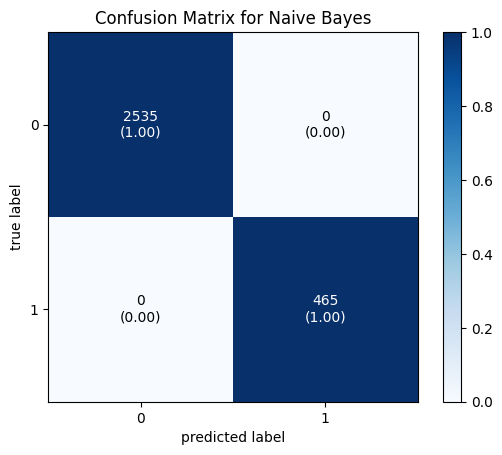

In [200]:
cnf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
plot_confusion_matrix(conf_mat=cnf_matrix_nb,
                      show_absolute=True, show_normed=True, colorbar=True)
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

## Logistic Regeression

In [201]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

metrics_lr = {
    "Model": "LR",
    "Accuracy": accuracy_score(y_test, y_pred_lr),
    "Precision": precision_score(y_test, y_pred_lr),
    "Recall": recall_score(y_test, y_pred_lr),
    "F1-Score": f1_score(y_test, y_pred_lr)
}

print("Logistic Regression Metrics:", metrics_lr)

Logistic Regression Metrics: {'Model': 'LR', 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1-Score': 1.0}


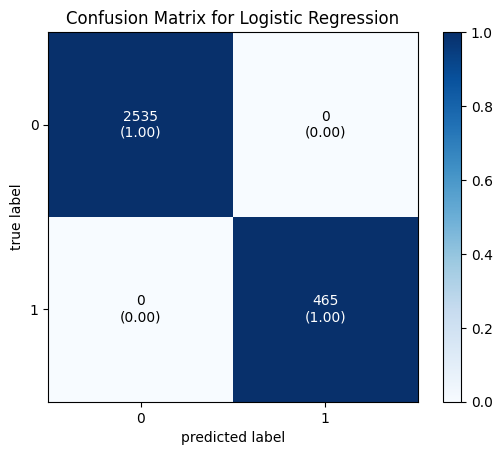

In [202]:
cnf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
plot_confusion_matrix(conf_mat=cnf_matrix_lr, show_absolute=True, show_normed=True, colorbar=True)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

## Random Forest

In [203]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

metrics_rf = {
    "Model": "RF",
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1-Score": f1_score(y_test, y_pred_rf)
}

print("Random Forest Metrics:", metrics_rf)


Random Forest Metrics: {'Model': 'RF', 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1-Score': 1.0}


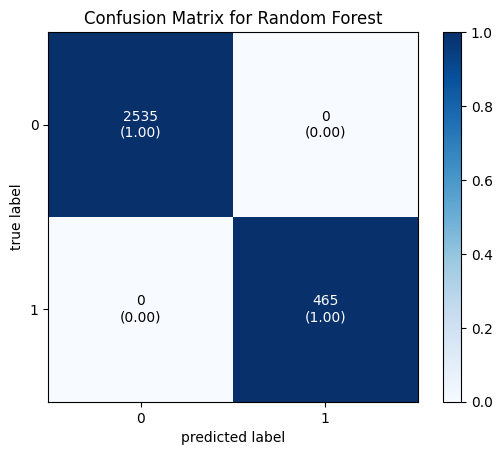

In [204]:
cnf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plot_confusion_matrix(conf_mat=cnf_matrix_rf, show_absolute=True, show_normed=True, colorbar=True)
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Step4: Evaluation

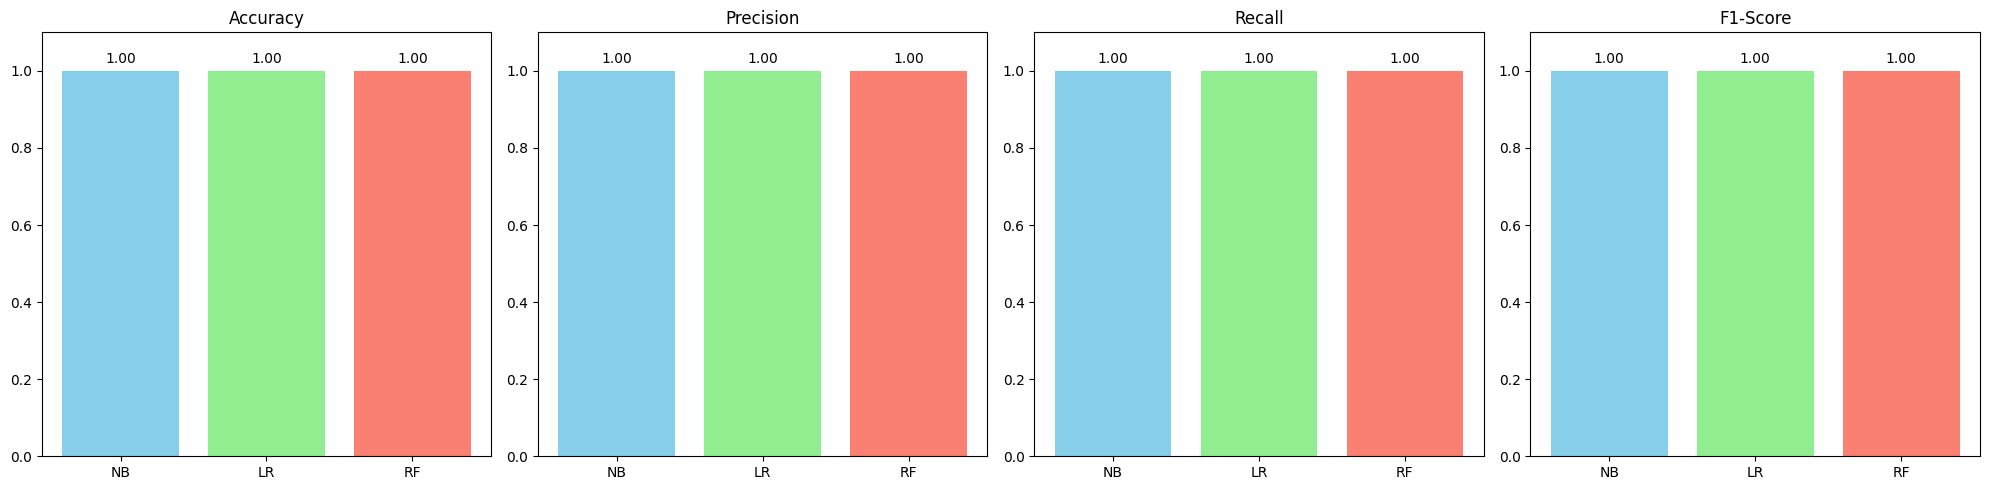

In [205]:
fig, axes = plt.subplots(1, 4, figsize=(20,5))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
results_df = pd.DataFrame([metrics_nb, metrics_lr, metrics_rf])

for i, metric in enumerate(metrics):
    axes[i].bar(results_df['Model'], results_df[metric], color=['skyblue', 'lightgreen', 'salmon'])
    axes[i].set_title(metric)
    axes[i].set_ylim(0, 1.1)
    # Correct way: set ticks before labels
    axes[i].set_xticks(range(len(results_df['Model'])))
    axes[i].set_xticklabels(results_df['Model'])
    # Show value above bars
    for j, value in enumerate(results_df[metric]):
        axes[i].text(j, value + 0.02, f"{value:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


# Save the Naive Bayes Model and Vectorizer

In [207]:
import pickle

# Save the Naive Bayes model
with open("naive_bayes_model.pkl", "wb") as f:
    pickle.dump(nb_model, f)

# Save the TF-IDF vectorizer
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf_vectorizer, f)

print("Model and vectorizer saved successfully!")


Model and vectorizer saved successfully!


In [208]:
from google.colab import files

files.download("naive_bayes_model.pkl")
files.download("tfidf_vectorizer.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>